# 필요 라이브러리 불러오기

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('./data/ml_data/boston.csv')

In [7]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 데이터 설명

- crim: 범죄율
- zn: 25,000 평방피트를 초과 거주지역 비율
- indus: 비소매상업지역 면적 비율
- chas: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- nox: 일산화질소 농도
- rm: 주택당 방 수
- age: 1940년 이전에 건축된 주택의 비율
- dis: 직업센터의 거리
- rad: 방사형 고속도로까지의 거리
- tax: 재산세율
- ptratio: 학생/교사 비율
- b: 인구 중 흑인 비율
- lstat: 인구 중 하위 계층 비율
- medv : 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

# Feature Selection

`상관계수`와 `공분산`을 바탕으로 피처를 선택하여 봅시다.

## 가설1 - 범죄율이 높은 곳의 집 값은 낮을까?

일반적인 상식으로는 범죄율이 높다면, 집 값은 낮아야하는게 사실입니다. 하지만 데이터를 살펴보았을 때 일반적인 상식과 다른 경우가 나오는 데이터가 있을 수 있으므로 꼭 실제 데이터로 그래프를 그려본 뒤 가설을 확인해보는것이 중요합니다.

In [8]:
# 먼저, 상관계수와 공분산은 연속형자료를 분석하기 때문에 범주형변수를 제거한다.
del data['chas']

In [9]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


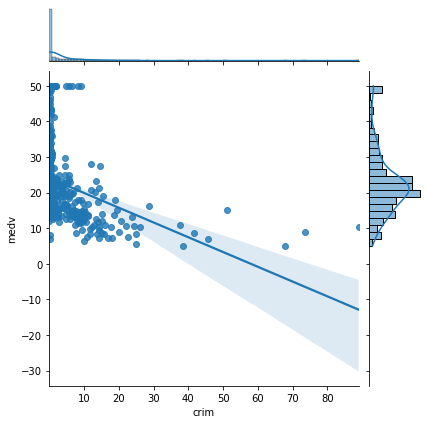

In [10]:
# 실제 집 값과 범죄율의 상관관계가 있는지 그래프를 통해 살펴봄.

sns.jointplot(data = data, x = 'crim', y = 'medv', kind = 'reg')

# 그래프를 보니 극단적 우하향은 아니지만 어느정도 상관은 있어보임

#### `x.cov(y)`

- 공분산을 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.cov()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산하여 줍니다.

In [11]:
# 실제 범죄율과 집 값의 공분산을 확인.
data['crim'].cov(data['medv'])

# -30이라는 결과가 굉장히 큰 정대값처럼 보이지만 사실은 그렇지 않다.
# crim의 범위가 80까지나 있기 때문

-30.718507964458183

#### `x.corr(y)`

- 상관계수를 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.corr()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산하여 줍니다.

In [12]:
# cov를 보완한 것이 corr
# 실제 상관계수가 몇인지도 확인.
data['crim'].corr(data['medv'])

# -0.3 ~ -0.6 = 음의 상관관계가 있다.

-0.38830460858681165

## 가설2 - 방의 개수가 많은 곳이 집 값이 비쌀까?

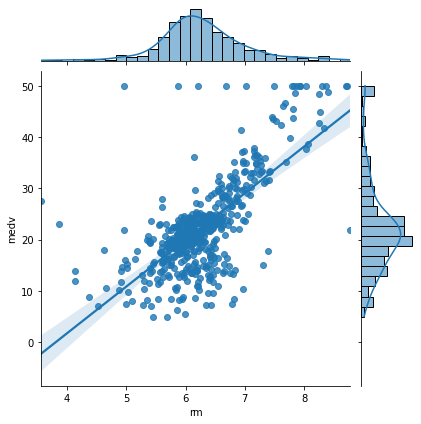

In [15]:
# 방의 개수가 늘어날수록 집 값도 늘어나는가?
sns.jointplot(data = data, x = 'rm', y = 'medv', kind = 'reg')

In [13]:
# 실제 상관계수가 몇인지도 확인.
data['rm'].corr(data['medv'])

# 0.6 ~ 0.9 = 강한 양의 상관관계

0.6953599470715394

In [14]:
# 위와 같이 공분산도 확인.
data['rm'].cov(data['medv'])

# 4.49라는 결과가 범죄율의 cov에 비해 작은 절대값처럼 나왔지만
# 이는 rm의 절대값 최대가 8이기 때문.
# 즉, cov로 확인한 절대값은 신뢰도가 낮다.
# 따라서 corr로 확인하는 것이 좋다.

4.493445879544476

#### `sns.heatmap(df, cmap, annot, fmt)`

- 앞에서 배운 heatmap의 심화
- cmap - 전체적인 색을 지정 (summer /  YlGnBu / RdYlGn_r 등)
- annot - True / False 로써 숫자를 표현해줄 것인지 기입
- fmt - 숫자의 소숫점 자리수 설정

<AxesSubplot:>

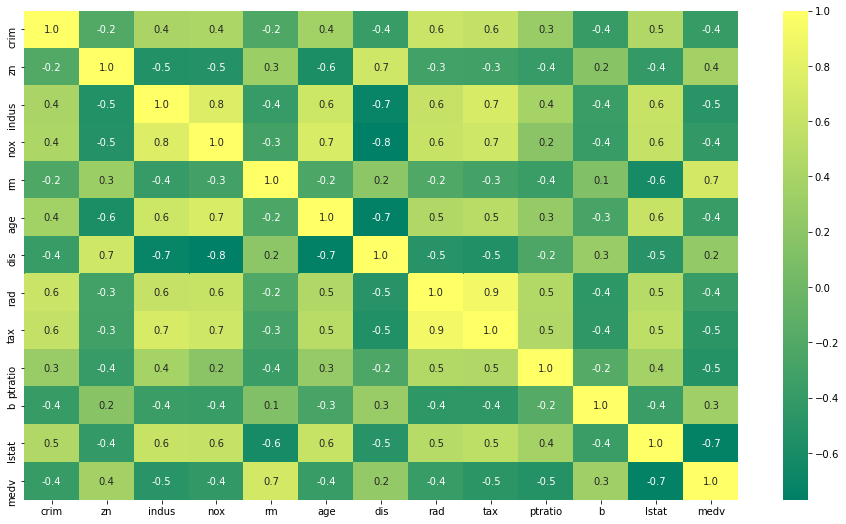

In [50]:
plt.figure(figsize = (16, 9))

sns.heatmap(data.corr(), cmap = 'summer', annot = True, fmt = '.1f')

#### `plt.figure(figsize = (가로, 세로))`

- 도화지의 크기 설정

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

# Feature Extraction

`PCA`를 이용하여 새로운 변수를 만들어보자.

In [15]:
# 변수들의 상관계수를 전부 확인하고 몇개의 변수를 몇개로 줄일 것 인지 확인.
corr_bar = []

# 변수들과 상관계수를 전부 확인
for column in data.columns:
    print(f"{column}과 집값(medv)의 상관관계 : {data[column].corr(data['medv'])}")
    
    # corr_bar 리스트 안에 넣어줌
    corr_bar.append(abs(data[column].corr(data['medv'])))  # abs는 절대값

crim과 집값(medv)의 상관관계 : -0.38830460858681165
zn과 집값(medv)의 상관관계 : 0.36044534245054305
indus과 집값(medv)의 상관관계 : -0.4837251600283728
nox과 집값(medv)의 상관관계 : -0.42732077237328264
rm과 집값(medv)의 상관관계 : 0.6953599470715394
age과 집값(medv)의 상관관계 : -0.3769545650045963
dis과 집값(medv)의 상관관계 : 0.24992873408590394
rad과 집값(medv)의 상관관계 : -0.3816262306397781
tax과 집값(medv)의 상관관계 : -0.46853593356776724
ptratio과 집값(medv)의 상관관계 : -0.5077866855375622
b과 집값(medv)의 상관관계 : 0.33346081965706653
lstat과 집값(medv)의 상관관계 : -0.737662726174015
medv과 집값(medv)의 상관관계 : 1.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

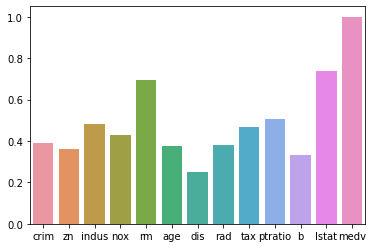

In [18]:
# 앞서 배운 barplot을 통하여 그래프를 그린다.

sns.barplot(data.columns, corr_bar)

# 막대가 작을 수록 상관계수가 작다.

In [19]:
# 수치형데이터 중에 비교적 상관계수가 낮은 두개의 변수를 선택.
# dis 랑 b 가 상관계수가 낮음

x = data[['dis', 'b']]

In [20]:
# PCA를 위한 라이브러리를 불러옴.

from sklearn.decomposition import PCA

#### `PCA(n_components)`

- n_components : 몇가지의 변수를 만들지 개수를 정합니다.
- 객체를 생성하는 개념

#### `PCA.fit(x)`

- x의 데이터를 학습시킴으로써 앞에서 생성한 객체가 데이터를 공부하는 개념

#### `PCA.components_`

- 앞서 학습한 내용을 바탕으로 만들어진 변수속에 담긴 이 전 변수의 분산이 담김 정도

#### `PCA.explained_variance_ratio_`

- 새로운 변수가 설명하는 분산의 비율

#### `PCA.transform`

- 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환

In [21]:
# 2개의 변수를 조합하여 1개의 변수를  만든다.

pca = PCA(n_components = 1)

In [22]:
# 데이터를 학습시킨다.
pca.fit(x)

PCA(n_components=1)

In [23]:
x.head()

,dis,b
0,4.0900,396.90
1,4.9671,396.90
2,4.9671,392.83
3,6.0622,394.63
4,6.0622,396.90


In [26]:
# 새로운 변수에 담긴 각 변수의 분산을 확인할 수 있다.
pca.components_
# 확인해보니 b 가 99% 를 차지한다.

array([[-0.00672682, -0.99997737]])

In [25]:
# 새로운 변수 PC1이 설명하는 분산의 비율.
pca.explained_variance_ratio_

array([0.9995135])

In [27]:
# 새로운 변수를 pc1이라는 컬럼에 추가.
data['pc1'] = pca.transform(x)

# pca.transform() : 위에서 fit을 학습시킨 내용을 바탕으로 변환을 실행
# pca.fit_transform() : 학습과 변환을 동시에 진행.
#                      학습시키는 데이터와 변형시키는 데이터가 같을 때 사용가능

In [28]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-40.240309


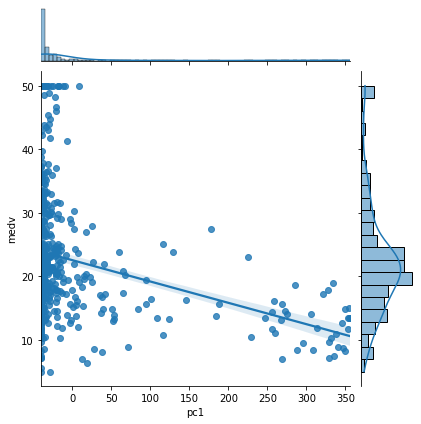

In [30]:
# 새로운 변수와 집 값의 상관관계를 확인.
sns.jointplot(data = data, x = 'pc1', y = 'medv', kind = 'reg')

In [31]:
# 상관계수확인.
data['pc1'].corr(data['medv'])

# 절대값 결과가 b 하나만의 상관계수와 거의. 유사하다.
# 그람 굳이 dis 와 b를 합칠 이유가 없음
# 정규화를 통해 해결할 수 있다.

-0.3334845106741897

# 정규화
`정규화`를 진행하기 전과 진행한 후의 결과 차이를 보며 정규화를 왜 해야하는지 알아봅시다.

#### `StandardScaler()`

- 정규화 객체 생성

#### `scaler.fit(x)`

- 정규화 객체로 학습

#### `scaler.transform(x)`

- 학습된 학습기로 변수 x의 데이터를 변환

In [35]:
# 정규화에 필요한 라이브러리
from sklearn.preprocessing import StandardScaler

In [36]:
# 정규화 객체 만들기
scaler = StandardScaler()

In [37]:
scaler.fit(x)
scaler_x = scaler.transform(x)

# scaler = scaler.fit_transform   이것도 사용가능

In [38]:
scaler_x

array([[ 0.1402136 ,  0.44105193],
       [ 0.55715988,  0.44105193],
       [ 0.55715988,  0.39642699],
       ...,
       [-0.77368357,  0.44105193],
       [-0.66843684,  0.4032249 ],
       [-0.61324648,  0.44105193]])

In [39]:
# PCA 의 개수 찾기
pca = PCA(n_components = 1)

# 데이터 학습
pca.fit(scaler_x)

# 새로운 변수에 담긴 각 변수의 분산을 확인
pca.components_

# 이제 분산의 정도가 같아졌음

array([[-0.70710678, -0.70710678]])

In [41]:
# 새로운 변수 PC1이 설명하는 분산의 비율
pca.explained_variance_ratio_

array([0.64575584])

In [42]:
# 다시 pc1 컬럼에 데이터를 넣는다.

data['pc1'] = pca.transform(scaler_x)

In [43]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-1.073946


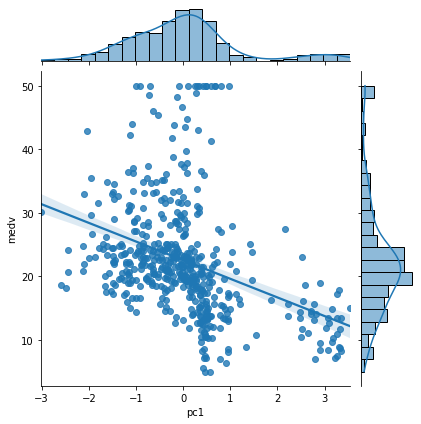

In [44]:
sns.jointplot(data = data, x = 'pc1', y = 'medv', kind = 'reg')

In [45]:
data['pc1'].corr(data['medv'])

-0.362989851000902

<h2> 이런 식으로 차원축소(PCA)를 이용해 상관성이 낮은 두 변수를 합쳐서 상관성이 높은 하나의 변수를 만들어낼 수 있다.